# 1: Setup & data preparation

Fitbit Dataset Sample:


,treatment_id,fitbit_id,date,calories,mets,level,steps,distance,season,is_holiday,day_of_week,target,month,day_of_month
0,1119,329,2014-12-01 00:00:00,1.3822,10,0,0.0,0.0,Winter,False,0,0,12,1
1,1119,329,2014-12-01 00:01:00,1.3822,10,0,0.0,0.0,Winter,False,0,0,12,1
2,1119,329,2014-12-01 00:02:00,1.3822,10,0,0.0,0.0,Winter,False,0,0,12,1
3,1119,329,2014-12-01 00:03:00,1.3822,10,0,0.0,0.0,Winter,False,0,0,12,1
4,1119,329,2014-12-01 00:04:00,1.3822,10,0,0.0,0.0,Winter,False,0,0,12,1



Dataset Statistics:


,treatment_id,fitbit_id,date,calories,mets,level,steps,distance,season,is_holiday,day_of_week,target,month,day_of_month
count,1.044240e+06,1.044240e+06,1044240,1.044240e+06,1.044240e+06,1.044240e+06,1.043100e+06,1.044240e+06,1044240,1044240,1.044240e+06,1.044240e+06,1.044240e+06,1.044240e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,False,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,402420,1044240,NaN,NaN,NaN,NaN
mean,1.121622e+03,3.305480e+02,2015-03-30 13:06:26.593886464,1.709672e+00,1.457896e+01,2.283623e-01,6.323363e+00,4.767763e-03,NaN,NaN,1.992358e+00,1.305476e-01,4.652838e+00,1.558843e+01
min,1.119000e+03,3.230000e+02,2014-12-01 00:00:00,5.526785e-01,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.120000e+03,3.250000e+02,2015-02-04 13:34:00,1.017400e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,1.000000e+00,0.000000e+00,2.000000e+00,8.000000e+00
50%,1.121000e+03,3.270000e+02,2015-03-23 21:29:30,1.271700e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,2.000000e+00,0.000000e+00,4.000000e+00,1.600000e+01
75%,1.123000e+03,3.290000e+02,2015-05-26 15:11:15,1.391800e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,3.000000e+00,0.000000e+00,6.000000e+00,2.300000e+01
max,1.125000e+03,3.490000e+02,2015-07-31 18:59:00,2.921148e+01,2.120000e+02,3.000000e+00,1.940000e+02,1.602700e-01,NaN,NaN,4.000000e+00,1.000000e+00,1.200000e+01,3.100000e+01


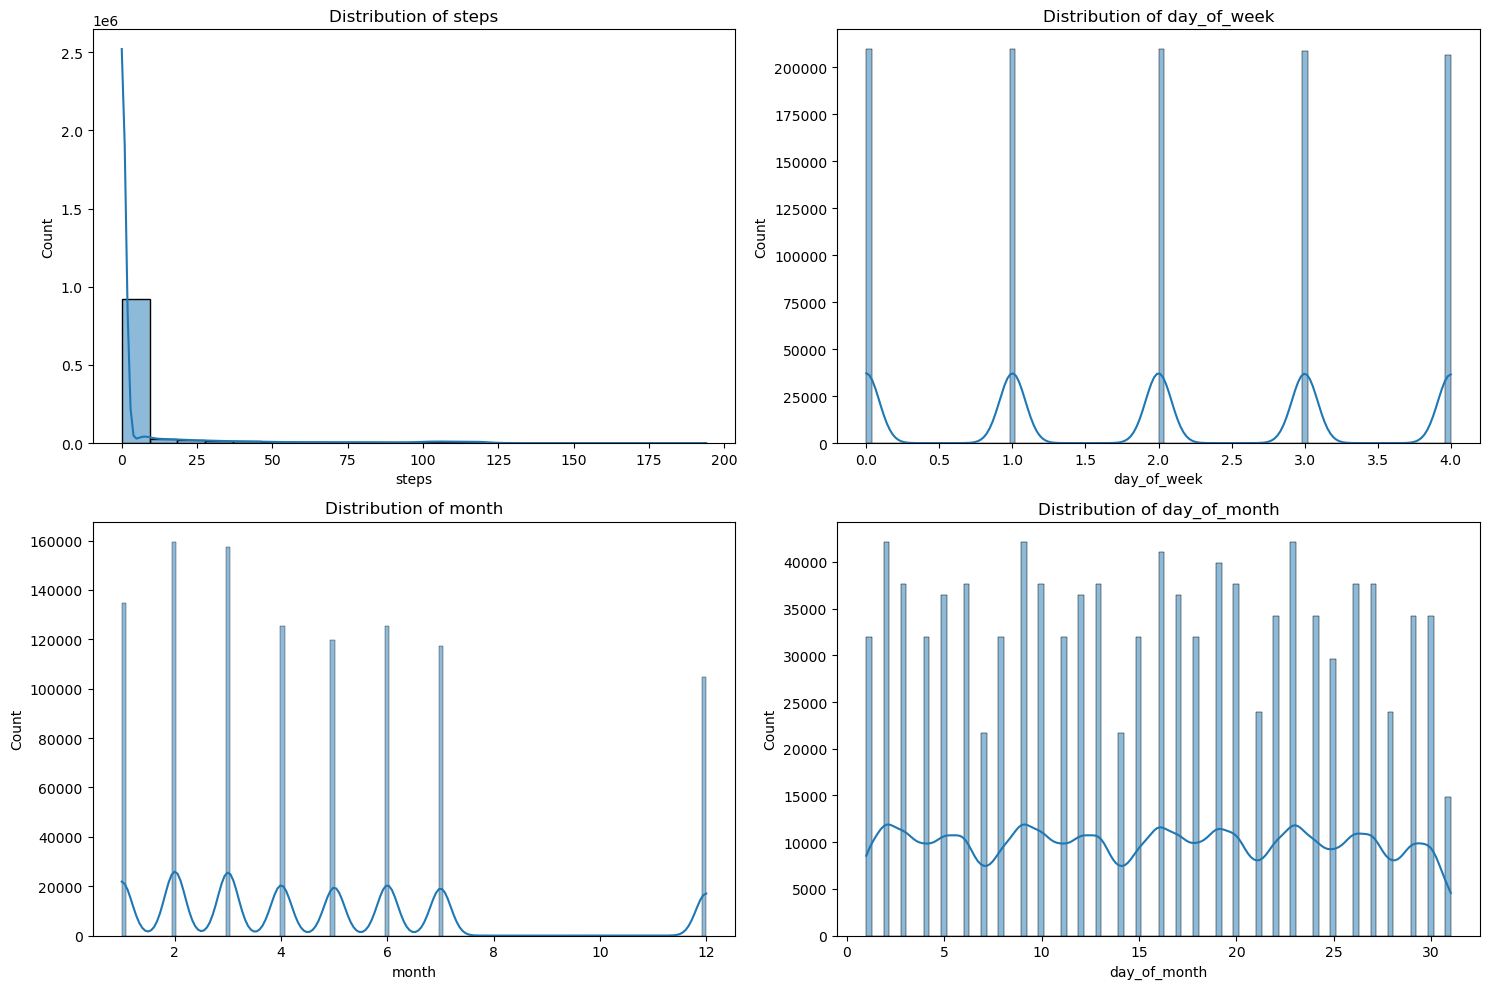

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Set random seed for reproducibility
np.random.seed(42)

# Load and prepare Fitbit data
def load_fitbit_data():
    # Define the path and get all CSV files
    path = "../datas/Data Coaching Fitbit/"
    files = glob.glob(os.path.join(path, "*.csv"))

    # List to store data from all CSVs
    dfs = []

    # Read all CSV files
    for file in files:
        df = pd.read_csv(file)

        # Convert 'date' column to datetime
        df['date'] = pd.to_datetime(df['date'])

        # Keep only weekdays (Monday to Friday)
        df = df[df['date'].dt.weekday < 5]

        # Keep only records at 18:00
        df = df[df['date'].dt.hour <= 18]

        # Append the cleaned data
        dfs.append(df)

    # Concatenate all dataframes
    df = pd.concat(dfs, ignore_index=True)

    # Calculate the average number of steps per person at 18:00 on a working day
    average_steps_per_person = df.groupby('fitbit_id')['steps'].mean()

    # Add 'season' feature
    def get_season(date):
        month = date.month
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Autumn'

    df['season'] = df['date'].apply(get_season)

    # Add 'is_holiday' feature (assuming you have a list of holidays)
    holidays = ['2023-01-01', '2023-12-25']  # Example list of holidays
    df['is_holiday'] = df['date'].dt.strftime('%Y-%m-%d').isin(holidays)

    # Add 'day_of_week' feature (0=Monday to 4=Friday)
    df['day_of_week'] = df['date'].dt.weekday

    # Add 'target' feature: whether the person reached their average steps
    df['target'] = df.apply(lambda row: 1 if row['steps'] >= average_steps_per_person[row['fitbit_id']] else 0, axis=1)

    # Add time-based features
    df['month'] = df['date'].dt.month
    df['day_of_month'] = df['date'].dt.day

    return df

# Load the data
fitbit_data = load_fitbit_data()

# Display first few rows
print("Fitbit Dataset Sample:")
display(fitbit_data.head())

# Basic statistics
print("\nDataset Statistics:")
display(fitbit_data.describe(include='all'))

# Visualize distributions
plt.figure(figsize=(15, 10))
numeric_cols = ['steps', 'day_of_week', 'month', 'day_of_month']
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(fitbit_data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Prepare data for modeling
categorical_features = ['season']
numeric_features = ['day_of_week', 'month', 'day_of_month', 'is_holiday']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X = fitbit_data[numeric_features + categorical_features]
y_class = fitbit_data['target']  # For classification

# Split data into train and test sets
X_train, X_test, y_class_train, y_class_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = numeric_features + list(cat_features)

# 2. Decision tree

DECISION TREE CLASSIFIER

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.61      0.73    181656
           1       0.20      0.63      0.30     27192

    accuracy                           0.61    208848
   macro avg       0.56      0.62      0.52    208848
weighted avg       0.82      0.61      0.68    208848


Confusion Matrix:
[[110754  70902]
 [  9947  17245]]


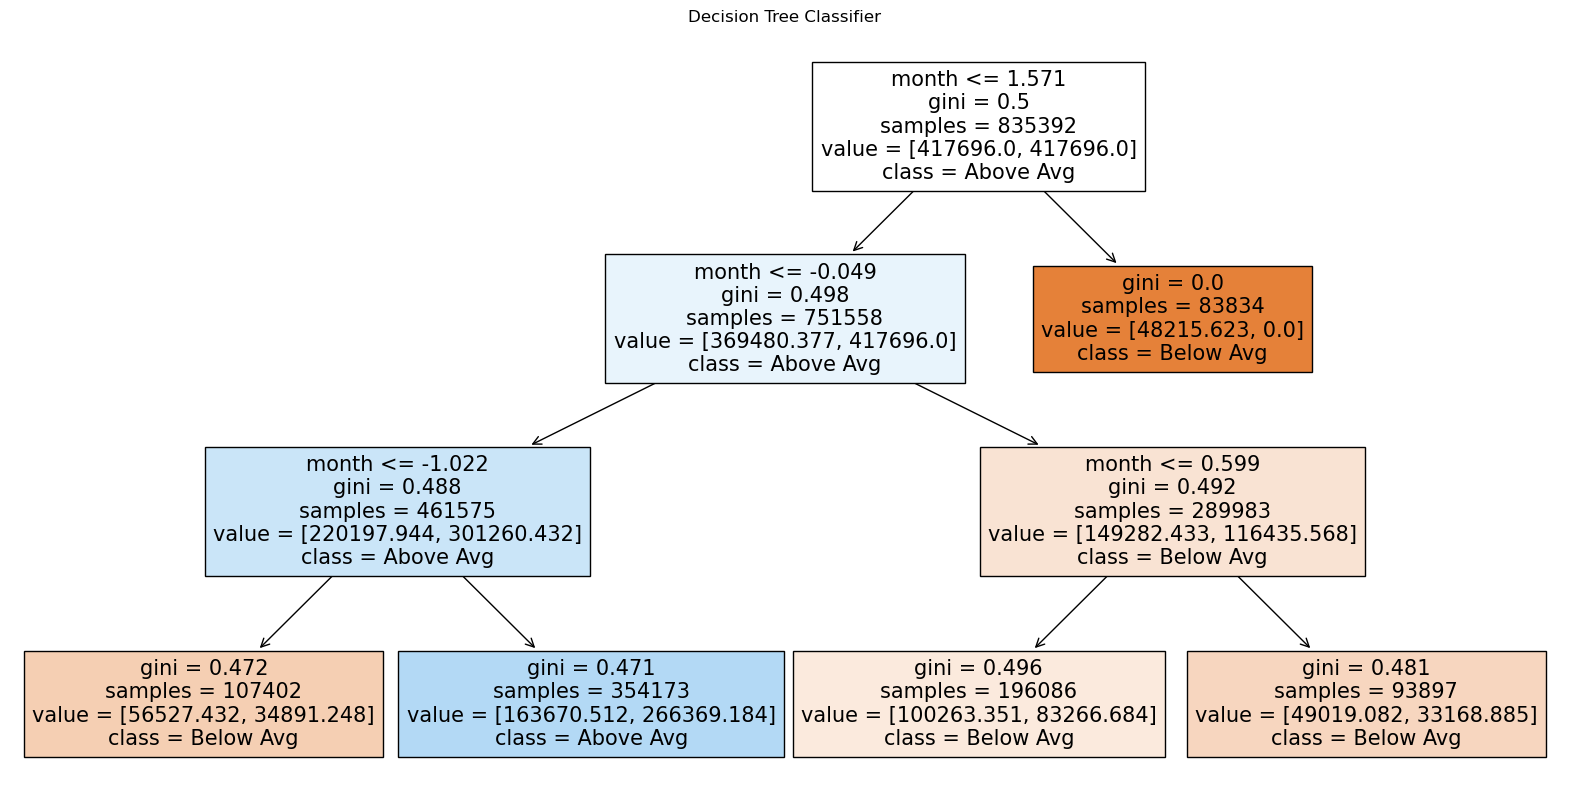

Feature Importances: [0. 1. 0. 0. 0. 0. 0.]


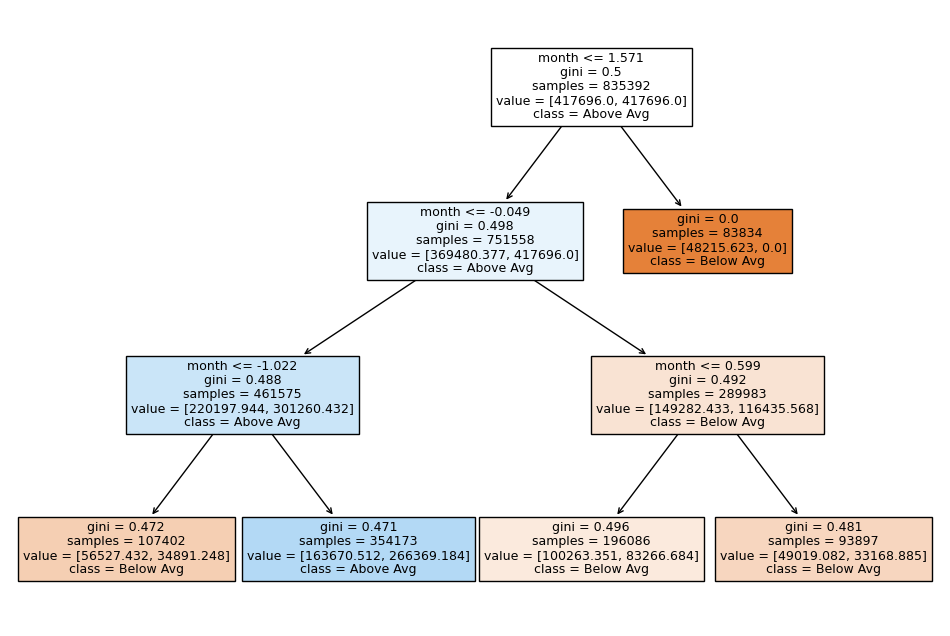

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

print("="*50)
print("DECISION TREE CLASSIFIER")
print("="*50)

# Initialize the classifier with class weights
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42, class_weight='balanced')
dt_classifier.fit(X_train_preprocessed, y_class_train)

# Predictions
y_pred_class = dt_classifier.predict(X_test_preprocessed)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_class_test, y_pred_class, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_class_test, y_pred_class))

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=all_features, class_names=['Below Avg', 'Above Avg'], filled=True)
plt.title("Decision Tree Classifier")
plt.show()

print("Feature Importances:", dt_classifier.feature_importances_)
plt.figure(figsize=(12,8))
plot_tree(dt_classifier, feature_names=all_features, class_names=['Below Avg', 'Above Avg'], filled=True)
plt.show()


# 3. Random forest

RANDOM FOREST CLASSIFIER

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.53      0.68    181656
           1       0.19      0.73      0.30     27192

    accuracy                           0.56    208848
   macro avg       0.56      0.63      0.49    208848
weighted avg       0.83      0.56      0.63    208848


Confusion Matrix:
[[96309 85347]
 [ 7273 19919]]


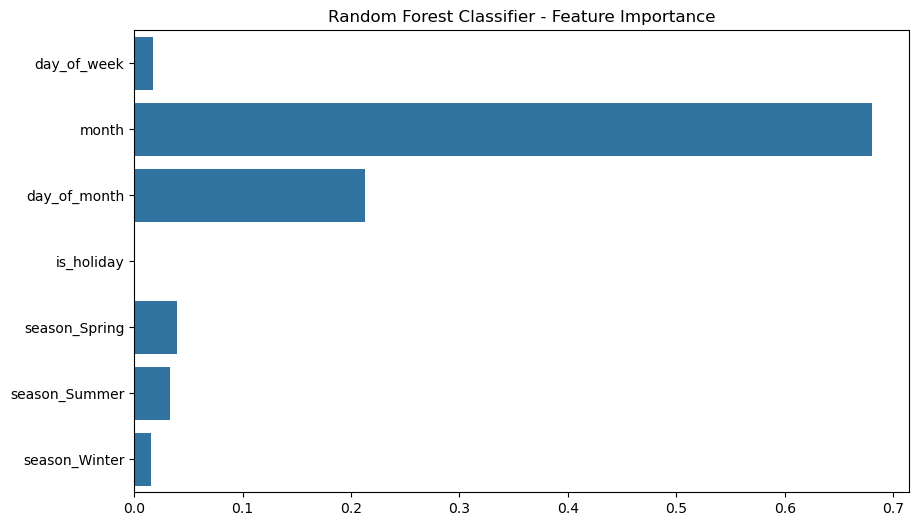

Feature Importances:
month            0.680664
day_of_month     0.213364
season_Spring    0.039402
season_Summer    0.032975
day_of_week      0.017585
season_Winter    0.016010
is_holiday       0.000000
dtype: float64


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("="*50)
print("RANDOM FOREST CLASSIFIER")
print("="*50)

# Initialize the classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train_preprocessed, y_class_train)

# Predictions
y_pred_class = rf_classifier.predict(X_test_preprocessed)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_class_test, y_pred_class, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_class_test, y_pred_class))

# Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_classifier.feature_importances_, y=all_features)
plt.title("Random Forest Classifier - Feature Importance")
plt.show()

print("Feature Importances:")
print(pd.Series(rf_classifier.feature_importances_, index=all_features).sort_values(ascending=False))


# 4. Logistic regression

LOGISTIC REGRESSION

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.48      0.63    181656
           1       0.17      0.70      0.27     27192

    accuracy                           0.51    208848
   macro avg       0.54      0.59      0.45    208848
weighted avg       0.82      0.51      0.58    208848


Confusion Matrix:
[[87524 94132]
 [ 8183 19009]]

Model Coefficients:
         Feature  Coefficient
5  season_Summer     0.363359
4  season_Spring     0.141712
2   day_of_month     0.048002
0    day_of_week     0.008992
3     is_holiday     0.000000
6  season_Winter    -0.622652
1          month    -0.936663


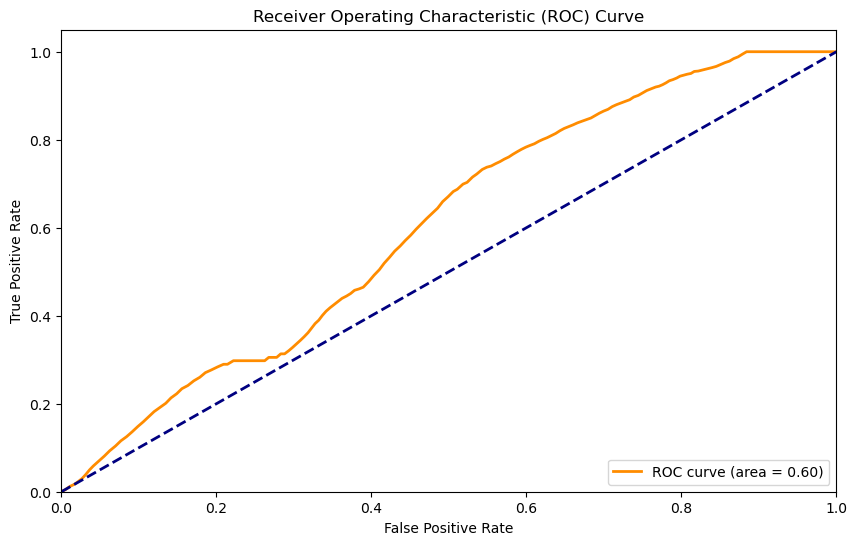

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

print("="*50)
print("LOGISTIC REGRESSION")
print("="*50)

# Initialize the classifier with class weights
logreg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
logreg.fit(X_train_preprocessed, y_class_train)

# Predictions
y_pred_class = logreg.predict(X_test_preprocessed)
y_pred_proba = logreg.predict_proba(X_test_preprocessed)[:, 1]

# Evaluation
print("\nClassification Report:")
print(classification_report(y_class_test, y_pred_class, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(y_class_test, y_pred_class))

# Coefficients
coefficients = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': logreg.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("\nModel Coefficients:")
print(coefficients)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_class_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 5. Naive bayes

NAIVE BAYES CLASSIFIER

Classification Report:
              precision    recall  f1-score   support

   Below Avg       0.87      1.00      0.93    181656
   Above Avg       0.00      0.00      0.00     27192

    accuracy                           0.87    208848
   macro avg       0.43      0.50      0.47    208848
weighted avg       0.76      0.87      0.81    208848


Confusion Matrix:
[[181656      0]
 [ 27192      0]]


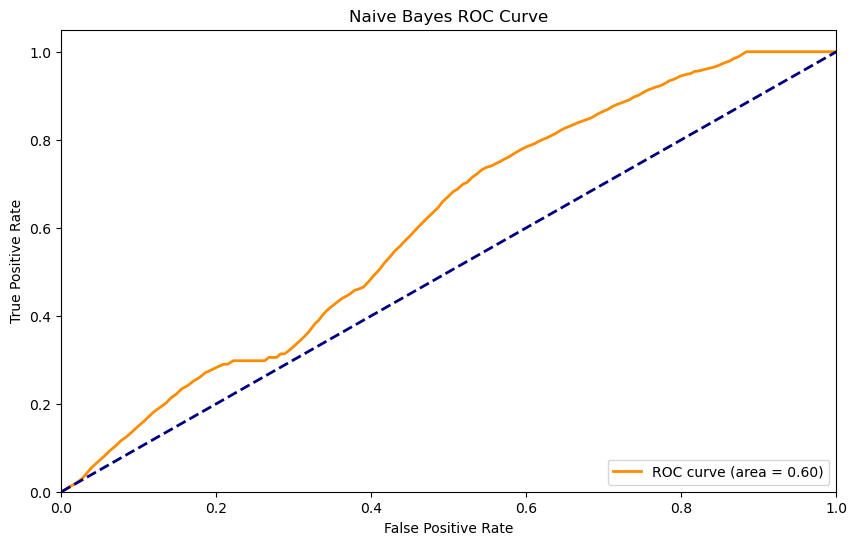


Class Distribution in Predictions:
0    208848
Name: count, dtype: int64

Class Distribution in Test Data:
target
0    181656
1     27192
Name: count, dtype: int64


In [5]:
from sklearn.naive_bayes import GaussianNB
import scipy.sparse

print("="*50)
print("NAIVE BAYES CLASSIFIER")
print("="*50)

# Check if X_train_preprocessed is a sparse matrix
if scipy.sparse.issparse(X_train_preprocessed):
    X_train_dense = X_train_preprocessed.toarray()
else:
    X_train_dense = X_train_preprocessed

# Initialize and fit the Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_dense, y_class_train)

# Predictions
X_test_dense = X_test_preprocessed.toarray() if scipy.sparse.issparse(X_test_preprocessed) else X_test_preprocessed
y_pred_class = nb.predict(X_test_dense)

# Evaluation with zero_division handled
print("\nClassification Report:")
print(classification_report(y_class_test, y_pred_class,
                            zero_division=0,
                            target_names=['Below Avg', 'Above Avg']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_class_test, y_pred_class))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_class_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
            label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Additional diagnostic information
print("\nClass Distribution in Predictions:")
print(pd.Series(y_pred_class).value_counts())

print("\nClass Distribution in Test Data:")
print(y_class_test.value_counts())

# 6. Neural network


NEURAL NETWORK (MLP)
Accuracy: 0.8698000459664444
Loss curve: [0.3562912454538439, 0.35625379813349234, 0.3562492147978824, 0.35616947208305555, 0.3561467095934738]


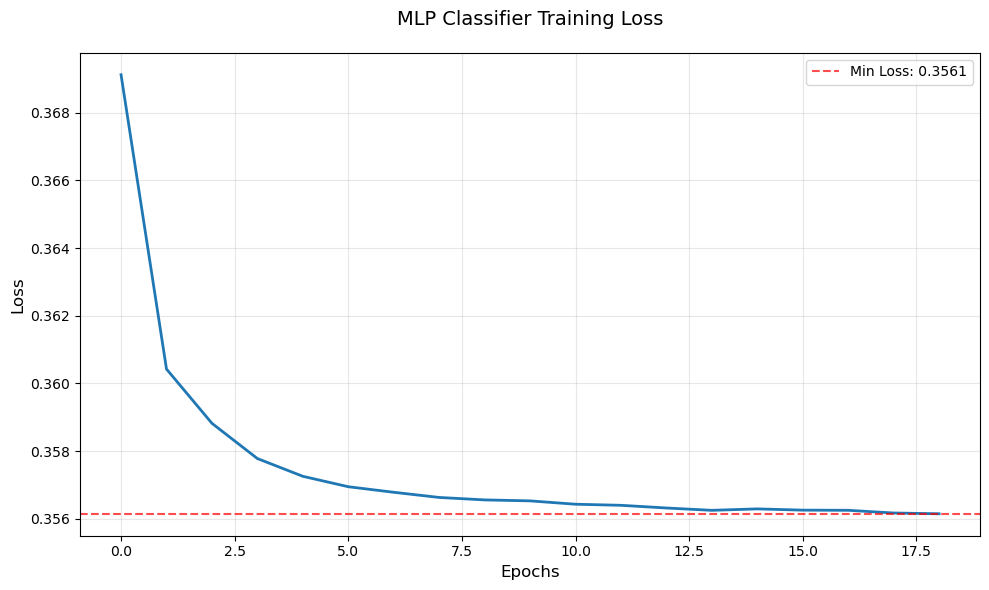

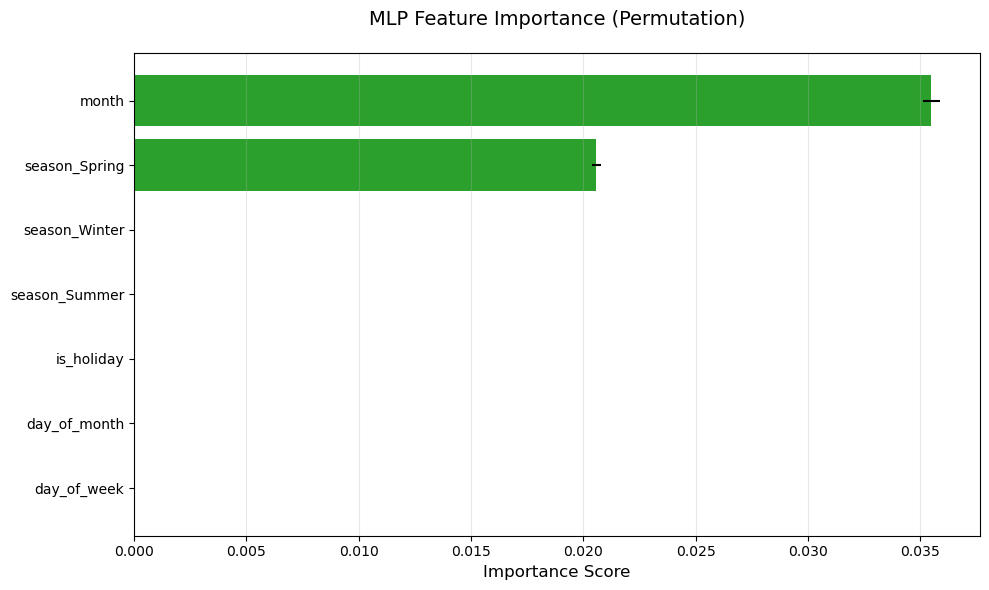

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

print("\n" + "="*50)
print("NEURAL NETWORK (MLP)")
print("="*50)

nn = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
nn.fit(X_train_preprocessed, y_class_train)
y_pred = nn.predict(X_test_preprocessed)

print("Accuracy:", accuracy_score(y_class_test, y_pred))
print("Loss curve:", nn.loss_curve_[-5:])  # Show last 5 loss values

plt.figure(figsize=(10, 6))
plt.plot(nn.loss_curve_, linewidth=2, color='#1f77b4')
plt.title('MLP Classifier Training Loss', fontsize=14, pad=20)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=min(nn.loss_curve_), color='r', linestyle='--', alpha=0.7,
            label=f'Min Loss: {min(nn.loss_curve_):.4f}')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
result = permutation_importance(nn, X_test_preprocessed, y_class_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.barh(range(X_test_preprocessed.shape[1]),
        result.importances_mean[sorted_idx],
        color='#2ca02c',
        xerr=result.importances_std[sorted_idx])
plt.yticks(range(X_test_preprocessed.shape[1]), np.array(all_features)[sorted_idx])
plt.title('MLP Feature Importance (Permutation)', fontsize=14, pad=20)
plt.xlabel('Importance Score', fontsize=12)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Classifiers comparison

ALL CLASSIFIERS COMPARISON
                 Model        Type  Accuracy  Precision  Recall        F1  \
0  Logistic Regression  Classifier    0.8698   0.756552  0.8698  0.809233   
1        Decision Tree  Classifier    0.8698   0.756552  0.8698  0.809233   
2        Random Forest  Classifier    0.8698   0.756552  0.8698  0.809233   
3          Naive Bayes  Classifier    0.8698   0.756552  0.8698  0.809233   
4       Neural Network  Classifier    0.8698   0.756552  0.8698  0.809233   

    ROC AUC  
0  0.603832  
1  0.665874  
2  0.681506  
3  0.629481  
4  0.677792  


<Figure size 1400x600 with 0 Axes>

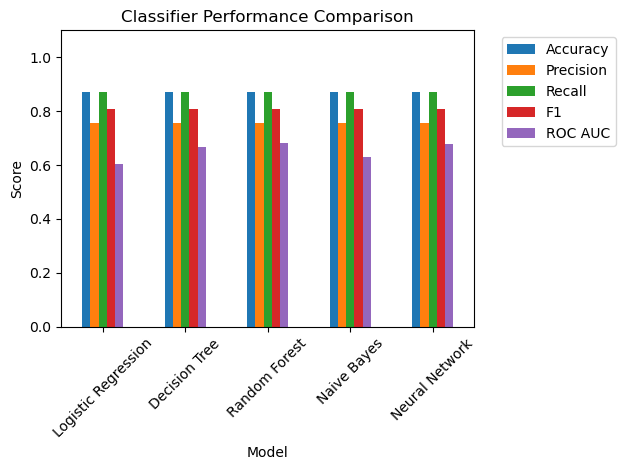

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                                roc_auc_score)
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse

# Assuming X_train_preprocessed, X_test_preprocessed, y_class_train, and y_class_test are already defined

# Check if the data is sparse and convert if necessary
X_train_dense = X_train_preprocessed.toarray() if scipy.sparse.issparse(X_train_preprocessed) else X_train_preprocessed
X_test_dense = X_test_preprocessed.toarray() if scipy.sparse.issparse(X_test_preprocessed) else X_test_preprocessed

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

print("="*50)
print("ALL CLASSIFIERS COMPARISON")
print("="*50)

clf_results = []
for name, clf in classifiers.items():
    # Fit and predict
    if name == "Naive Bayes":
        # Naive Bayes needs dense array
        clf.fit(X_train_dense, y_class_train)
        y_pred = clf.predict(X_test_dense)
        y_proba = clf.predict_proba(X_test_dense)[:, 1] if hasattr(clf, "predict_proba") else None
    else:
        clf.fit(X_train_preprocessed, y_class_train)
        y_pred = clf.predict(X_test_preprocessed)
        y_proba = clf.predict_proba(X_test_preprocessed)[:, 1] if hasattr(clf, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_class_test, y_pred)
    precision = precision_score(y_class_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_class_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_class_test, y_pred, average='weighted', zero_division=0)
    roc_auc = roc_auc_score(y_class_test, y_proba) if y_proba is not None else None

    clf_results.append({
        'Model': name,
        'Type': 'Classifier',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC AUC': roc_auc,
    })

# Display classifier results
classifiers_df = pd.DataFrame(clf_results).sort_values('Accuracy', ascending=False)
print(classifiers_df)

# Plot comparison for classifiers
if not classifiers_df.empty:
    plt.figure(figsize=(14, 6))
    classifiers_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']].plot(
        kind='bar', rot=45
    )
    plt.title('Classifier Performance Comparison')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()


# 8. Model comparison


COMPREHENSIVE MODEL COMPARISON - ACCURACY FOR ALL MODELS


,Model,Accuracy,Type
0,Logistic Regression,0.870,Classifier
1,Decision Tree,0.870,Classifier
2,Random Forest,0.870,Classifier
3,Naive Bayes,0.870,Classifier
4,Neural Network,0.870,Classifier


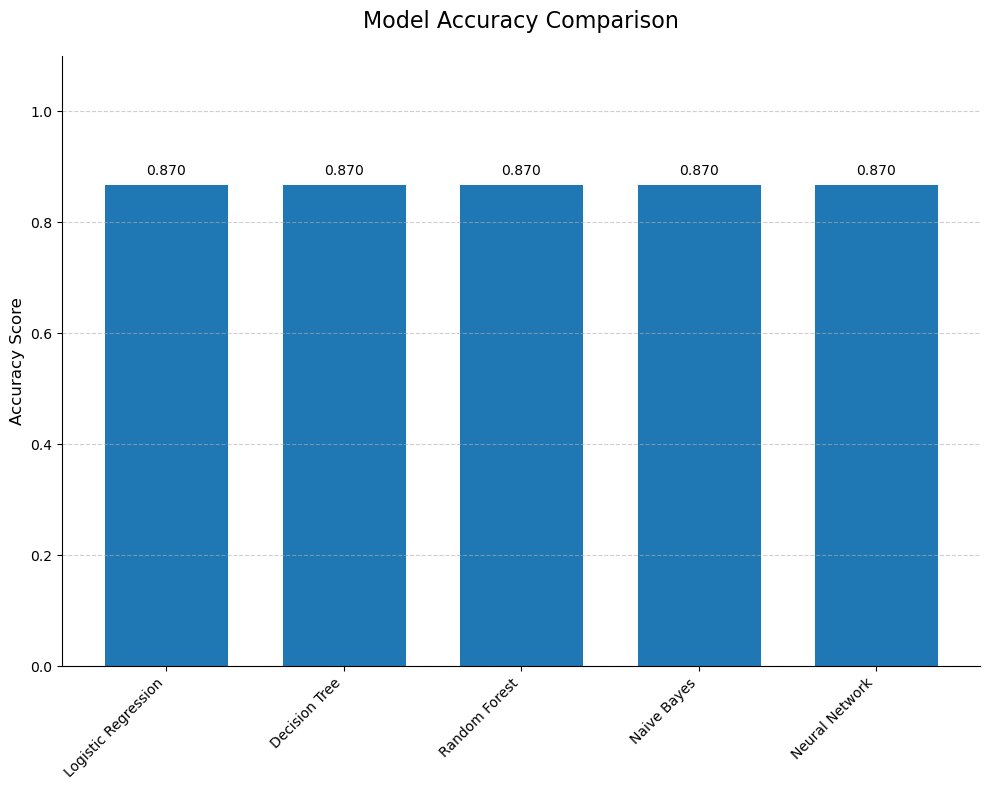

In [16]:
print("\n" + "="*50)
print("COMPREHENSIVE MODEL COMPARISON - ACCURACY FOR ALL MODELS")
print("="*50)

# Combine all models
final_comparison = classifiers_df[['Model', 'Accuracy', 'Type']].sort_values('Accuracy', ascending=False)

# Create styled display with better formatting
styled_display = final_comparison.style \
    .background_gradient(subset=['Accuracy'], cmap='YlGnBu') \
    .format({'Accuracy': '{:.3f}'}) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#40466e'),
                    ('color', 'white'),
                    ('font-weight', 'bold')]
    }])

display(styled_display)

# Create enhanced plot
plt.figure(figsize=(10, 8))
ax = plt.subplot()

# Create bars with better visual separation
bar_width = 0.7
positions = np.arange(len(final_comparison))
bars = ax.bar(positions,
                final_comparison['Accuracy'],
                width=bar_width,
                color='#1f77b4',
                edgecolor='white',
                linewidth=0.7)

# Enhanced labels and title
ax.set_title('Model Accuracy Comparison',
                fontsize=16, pad=20)
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_ylim(0, 1.1)

# Better x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(final_comparison['Model'], rotation=45, ha='right', fontsize=10)

# Add grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Add value labels with better formatting
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.,
            height + 0.01,
            f'{height:.3f}',
            ha='center',
            va='bottom',
            fontsize=10)

# Remove spines for cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


COMPREHENSIVE MODEL COMPARISON - ROC AUC FOR ALL MODELS


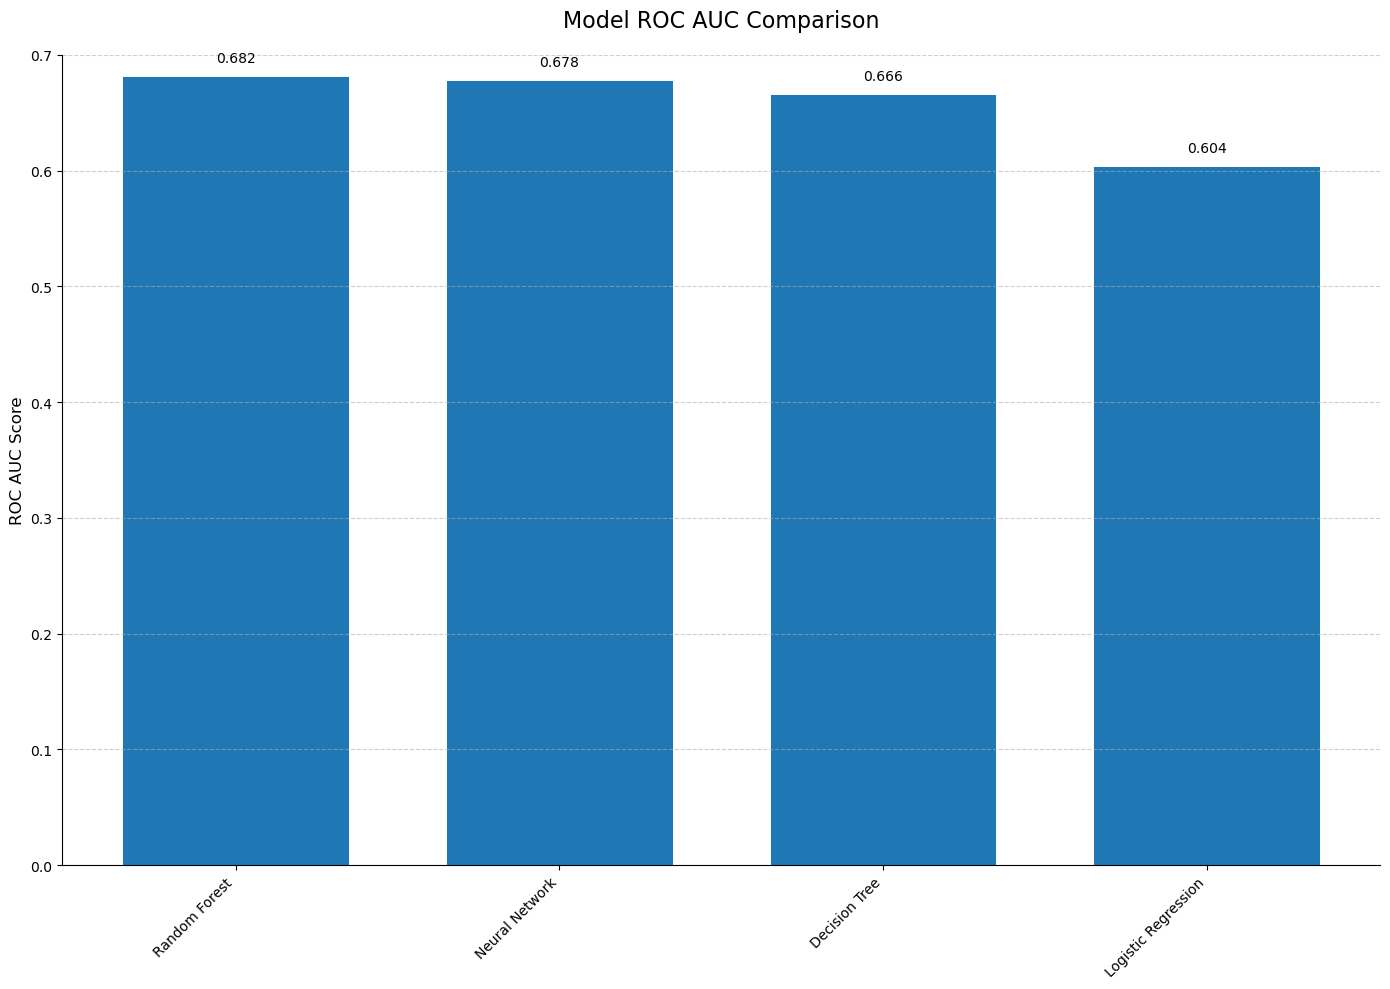

In [15]:
import numpy as np
import matplotlib.pyplot as plt

print("\n" + "="*50)
print("COMPREHENSIVE MODEL COMPARISON - ROC AUC FOR ALL MODELS")
print("="*50)

# Create styled display with better formatting
styled_display = final_comparison.style \
    .background_gradient(subset=['ROC AUC'], cmap='YlGnBu') \
    .format({'ROC AUC': '{:.3f}'}) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#40466e'),
                    ('color', 'white'),
                    ('font-weight', 'bold')]
    }])

print(styled_display)

# Create enhanced plot
plt.figure(figsize=(14, 10))
ax = plt.subplot()

# Create bars with better visual separation
bar_width = 0.7
positions = np.arange(len(final_comparison))
bars = ax.bar(positions,
                final_comparison['ROC AUC'],
                width=bar_width,
                color='#1f77b4',
                edgecolor='white',
                linewidth=0.7)

# Enhanced labels and title
ax.set_title('Model ROC AUC Comparison',
                fontsize=16, pad=20)
ax.set_ylabel('ROC AUC Score', fontsize=12)
ax.set_ylim(0, 0.7)

# Better x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(final_comparison['Model'], rotation=45, ha='right', fontsize=10)

# Add grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Add value labels with better formatting
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.,
            height + 0.01,
            f'{height:.3f}',
            ha='center',
            va='bottom',
            fontsize=10)

# Remove spines for cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()